## Lectura 8-1: Diagnóstico de modelos





## Supuestos del modelo

Recuerde el modelo de regresión lineal múltiple que hemos definido.

$$ Y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_{p-1} x_{i(p-1)} + \epsilon_i, \qquad i = 1, 2, \ldots, n. $$

Utilizando la notación matricial, este modelo puede escribirse de forma mucho más sucinta como

$$Y = X \beta + \epsilon. $$

Dados los datos, hallamos las estimaciones de los parámetros $\beta$ utilizando

$$ \hat{\beta} = \left(  X^\top X  \right)^{-1}X^\top y. $$

A continuación, observamos que estas estimaciones tenían medias
$$\text{E}[\hat{\beta}] = \beta,$$

y varianza

$$\text{Var}[\hat{\beta}] = \sigma^2 \left(  X^\top X  \right)^{-1}.$$

En particular, un parámetro individual, digamos $\hat{\beta}_j$ tenía una distribución normal

$$ \hat{\beta}_j \sim N\left(\beta_j, \sigma^2 C_{jj}  \right) $$

donde $C$ era la matriz definida como

$$C = \left(X^\top X\right)^{-1}.$$

A continuación, utilizamos este hecho para definir

$$\frac{\hat{\beta}_j - \beta_j}{s_e \sqrt{C_{jj}}} \sim t_{n-p}, $$

que utilizamos para realizar pruebas de hipótesis.

Hasta ahora hemos analizado varias métricas como RMSE, RSE y $R^2$ para determinar lo bien que nuestro modelo se ajusta a nuestros datos. Cada uno de ellos considera de alguna manera la expresión

$$\sum_{i = 1}^n (y_i - \hat{y}_i)^2.$$

Esencialmente, cada uno de ellos analiza la proximidad de los puntos de datos al modelo. Sin embargo, ¿es eso lo único que nos importa?

- Podría ser que los errores se cometieran de forma sistemática, lo que significa que nuestro modelo está mal especificado. Es posible que necesitemos términos de interacción adicionales, o términos polinómicos que veremos más adelante.
- También es posible que en un determinado conjunto de valores predictores, los errores sean muy pequeños, pero en un conjunto diferente de valores predictores, los errores sean grandes.
- Tal vez la mayoría de los errores sean muy pequeños, pero algunos son muy grandes. Esto sugeriría que los errores no siguen una distribución normal.

¿Son éstas cuestiones que nos preocupan? Si lo único que queremos es predecir, posiblemente no, ya que sólo nos importaría el tamaño de nuestros errores. Sin embargo, si quisiéramos realizar una inferencia, por ejemplo para determinar si un predictor concreto es importante, sí nos importan mucho. Todos los resultados distribucionales, como una prueba $t$ para un único predictor, se derivan bajo los supuestos de nuestro modelo.

Técnicamente, los supuestos del modelo se codifican directamente en una declaración de modelo como,

$$ Y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_{p-1} x_{i(p-1)} + \epsilon_i$$

donde $\epsilon_i \sim N(0, \sigma^2).$

A menudo, las **suposiciones de la regresión lineal**, se enuncian como,

- **L**inealidad: la respuesta puede escribirse como una combinación lineal de los predictores. (Con ruido sobre esta verdadera relación lineal).
- **I**independencia: los errores son independientes.
- **N**ormalidad: la distribución de los errores debe seguir una distribución normal.
- **I**gual varianza: la varianza del error es la misma para cualquier conjunto de valores predictores.

La hipótesis de linealidad se codifica como

$$\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_{p-1} x_{i(p-1)}, $$

mientras que los tres restantes están codificados en

$$\epsilon_i \sim N(0, \sigma^2),$$

ya que las $\epsilon_i$ son $iid$ variables aleatorias normales con varianza constante.

Si se cumplen estos supuestos, ¡genial! Podemos realizar la inferencia, **y es válida**. Si estos supuestos *no* se cumplen, aún podemos "realizar" una prueba $t$ utilizando `Python`, pero los resultados **no son válidos**. Las distribuciones de las estimaciones de los parámetros no serán las que esperamos. Las pruebas de hipótesis se aceptarán o rechazarán incorrectamente. Esencialmente, "basura dentro, basura fuera".



## Comprobación de supuestos

Ahora veremos una serie de herramientas para comprobar los supuestos de un modelo lineal. Para probar estas herramientas, utilizaremos datos simulados de tres modelos:

$$ Y = 3 + 5x + , N(0, 1) $$

$$ Y = 3 + 5x + , N(0, x^2) $$

$$ Y = 3 + 5x^2 + , N(0, 25) $$


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set(style='whitegrid')

def sim_1(sample_size=500):
    np.random.seed(42)
    x = np.random.uniform(low=0, high=5, size=sample_size)
    y = 3 + 5 * x + np.random.normal(loc=0, scale=1, size=sample_size)
    return pd.DataFrame({'x': x, 'y': y})

def sim_2(sample_size=500):
    np.random.seed(42)
    x = np.random.uniform(low=0, high=5, size=sample_size)
    y = 3 + 5 * x + np.random.normal(loc=0, scale=x, size=sample_size)
    return pd.DataFrame({'x': x, 'y': y})

def sim_3(sample_size=500):
    np.random.seed(42)
    x = np.random.uniform(low=0, high=5, size=sample_size)
    y = 3 + 5 * x ** 2 + np.random.normal(loc=0, scale=5, size=sample_size)
    return pd.DataFrame({'x': x, 'y': y})

def plot_data_and_fit(model, data, title):
    plt.figure(figsize=(10,5))
    plt.scatter(data['x'], data['y'], color='grey', s=20, label='Data')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    # Fitting model
    model.fit(data[['x']], data['y'])
    # Plotting the fit
    x = np.linspace(data['x'].min(), data['x'].max(), 100).reshape(-1, 1)
    plt.plot(x, model.predict(x), color='darkorange', lw=3, label='Fit')
    plt.legend(loc='upper left')
    plt.show()
    
    # Residuals plot
    plt.figure(figsize=(10,5))
    plt.scatter(model.predict(data[['x']]), data['y'] - model.predict(data[['x']]), color='grey', s=20)
    plt.axhline(0, color='darkorange', lw=2)
    plt.title(f'Residuals of {title}')
    plt.xlabel('Fitted')
    plt.ylabel('Residuals')
    plt.show()





### Gráfico de ajuste frente a residuos

Probablemente, nuestra herramienta más útil será un **Plot ajustado frente a residuales**. Será útil para comprobar los supuestos de **linealidad** y **varianza constante**.

Los datos generados a partir del Modelo 1 anterior no deberían mostrar ningún signo de violación de los supuestos, así que usaremos esto para ver cómo debería ser un buen gráfico de ajuste frente a residuos. Primero, simularemos las observaciones de este modelo.



A continuación, ajustamos el modelo y añadimos la línea ajustada a un gráfico de dispersión.



Posteriormente trazamos un gráfico de ajuste frente a los residuos. Tenga en cuenta que se trata de residuos en el eje $y$ a pesar de la ordenación en el nombre. A veces verá que esto se denomina gráfico de residuos frente a ajustados, o residuos frente a predichos.


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


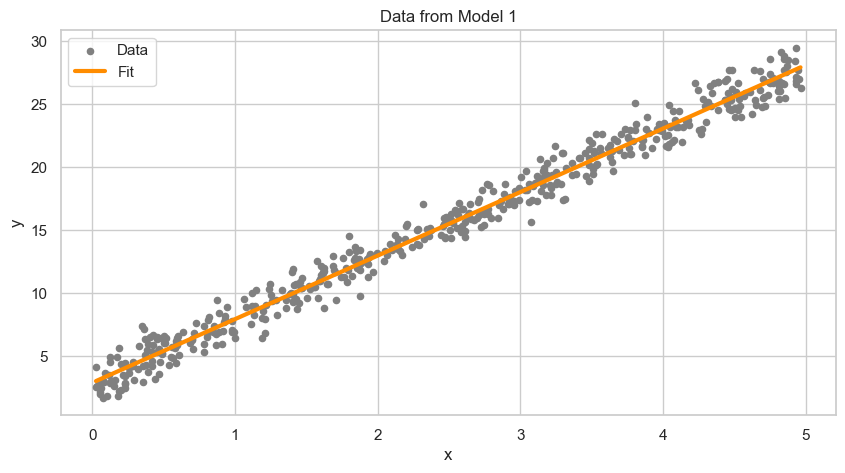

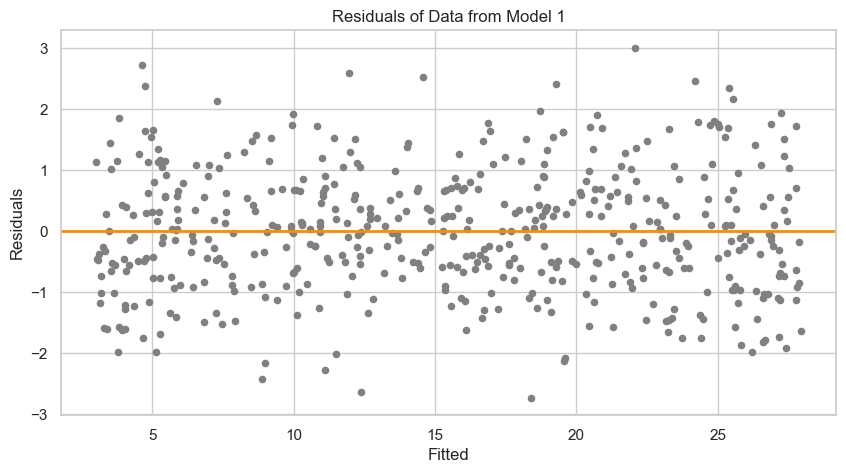

In [2]:
# Simulating and plotting the data for each model
lr = LinearRegression()

sim_data_1 = sim_1()
plot_data_and_fit(lr, sim_data_1, 'Data from Model 1')




Debemos buscar dos cosas en este gráfico.

- En cualquier valor ajustado, la media de los residuos debe ser aproximadamente 0. Si es así, la hipótesis de *linealidad* es válida. Por esta razón, generalmente añadimos una línea horizontal en $y = 0$ para enfatizar este punto.
- En cada valor ajustado, la dispersión de los residuos debería ser aproximadamente la misma. Si éste es el caso, la hipótesis de *varianza constante* es válida.

Aquí vemos que este es el caso para ambos.



**Para tener una mejor idea de cómo un gráfico de ajuste frente a residuos puede ser útil, simularemos a partir de modelos con supuestos violados.**



El modelo 2 es un ejemplo de varianza no constante. En este caso, la varianza es mayor para valores mayores de la variable predictora $x$.


En realidad, esto es bastante fácil de ver aquí añadiendo la línea ajustada a un gráfico de dispersión. Esto se debe a que sólo estamos realizando una regresión lineal simple. Con la regresión múltiple, un gráfico de ajuste frente a los residuos es una necesidad, ya que la adición de una regresión ajustada a un gráfico de dispersión no es exactamente posible.


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


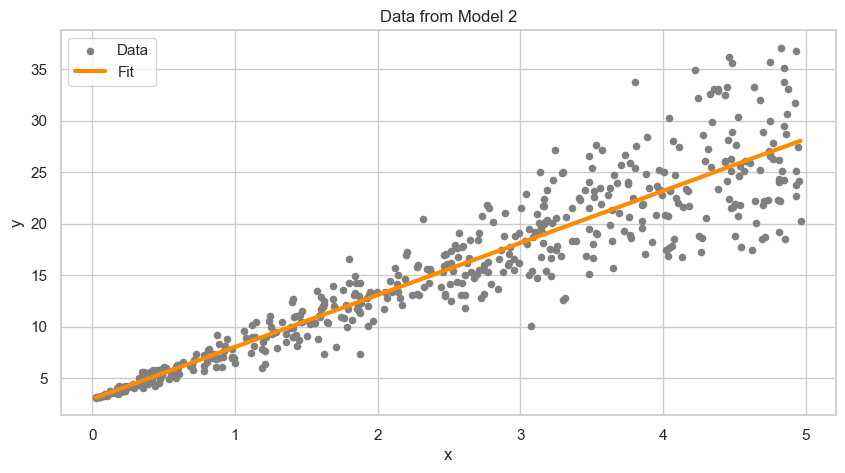

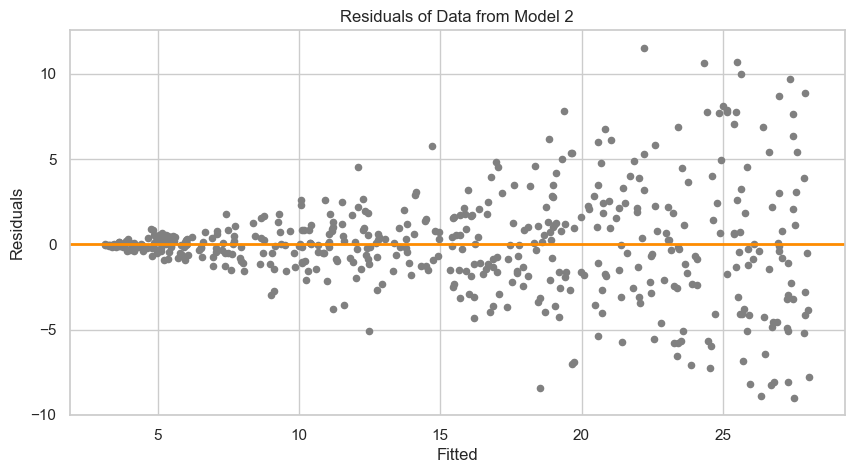

In [3]:
sim_data_2 = sim_2()
plot_data_and_fit(lr, sim_data_2, 'Data from Model 2')




En el gráfico de ajuste frente a residuos, vemos dos cosas muy claras. Para cualquier valor ajustado, los residuos parecen centrarse aproximadamente en 0. ¡Esto es bueno! No se incumple el supuesto de linealidad. Sin embargo, también vemos claramente que para valores ajustados mayores, la dispersión de los residuos es mayor. Esto es malo. Aquí se viola la hipótesis de varianza constante.



Ahora demostraremos un modelo que no cumple el supuesto de linealidad. El modelo 3 es un ejemplo de un modelo en el que $Y$ no es una combinación lineal de los predictores. En este caso el predictor es $x$, pero el modelo utiliza $x^2$. (Veremos más adelante que esto es algo que un modelo "lineal" puede tratar. La solución es sencilla: ¡haga que $x^2$ sea un predictor!)



De nuevo, esto queda bastante claro en el diagrama de dispersión, pero de nuevo, no podríamos comprobar este diagrama para la regresión múltiple.


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


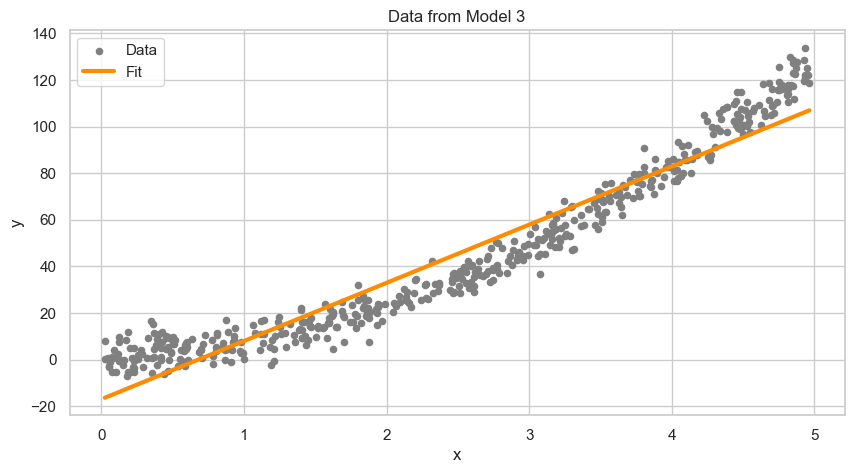

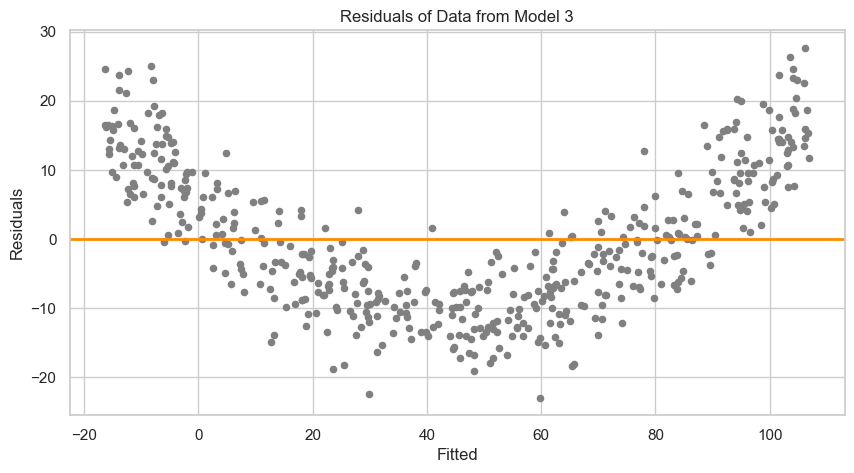

In [4]:
sim_data_3 = sim_3()
plot_data_and_fit(lr, sim_data_3, 'Data from Model 3')


Esta vez, en el gráfico de valores ajustados frente a residuos, la dispersión de los residuos es prácticamente la misma para cualquier valor ajustado. Sin embargo, ¡ni siquiera están centrados en cero! En los valores ajustados pequeños y grandes, el modelo subestima, mientras que en los valores ajustados medios, el modelo sobreestima. Se trata de errores sistemáticos, no de ruido aleatorio. Así que se cumple el supuesto de varianza constante, pero se viola el supuesto de linealidad. La forma de nuestro modelo es simplemente errónea. ¡Estamos tratando de ajustar una línea a una curva!



### Prueba de Breusch-Pagan

La varianza constante a menudo se llama **homoscedasticidad**. Por el contrario, la varianza no constante se llama **heteroscedasticidad**. Hemos visto cómo podemos utilizar un gráfico de ajuste frente a residuos para buscar estos atributos.

Aunque un gráfico de ajuste frente a residuos puede darnos una idea sobre la homocedasticidad, a veces preferimos una prueba más formal. Hay muchas pruebas para la varianza constante, pero aquí vamos a presentar una, el
<a href="https://en.wikipedia.org/wiki/Breusch%E2%80%93Pagan_test"
target="_blank"><strong>Breusch-Pagan Test</strong></a>. Los detalles exactos de la prueba se omitirán aquí, pero lo importante es que se puede considerar que la nula y la alternativa son,

- $H_0$: Homoscedasticidad. Los errores tienen varianza constante respecto al modelo verdadero.
- $H_1$: Heteroscedasticidad. Los errores tienen varianza no constante sobre el modelo verdadero.

¿No es conveniente? Una prueba que probará específicamente la **suposición de varianza constante**.

La prueba de Breusch-Pagan no se puede realizar por defecto en `Python`, sin embargo la función `bptest` en el paquete `lmtest` implementa la prueba.


In [5]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan


Probémoslo con los tres modelos que hemos ajustado antes. Recordemos,



- `fit_1` no violó los supuestos,
- `fit_2` violó el supuesto de varianza constante, pero no la linealidad,
- `fit_3` violó la linealidad, pero no la varianza constante.


In [6]:
# Fit model
sim_data_1 = sim_1()
X = sm.add_constant(sim_data_1['x'])
model = sm.OLS(sim_data_1['y'], X).fit()

bp_test = het_breuschpagan(model.resid, model.model.exog)
print(f"Breusch-Pagan test :\nLM Statistic: {bp_test[0]}\nLM-Test p-value: {bp_test[1]}\nF-Statistic: {bp_test[2]}\nF-Test p-value: {bp_test[3]}\n")



Breusch-Pagan test :
LM Statistic: 1.1472521637030941
LM-Test p-value: 0.2841251075614587
F-Statistic: 1.1452910302734016
F-Test p-value: 0.2850554830238379




Para `fit_1` vemos un valor p grande, por lo que no rechazamos la nulidad de homocedasticidad, que es lo que esperaríamos.

In [7]:
# Fit model
sim_data_2 = sim_2()
X = sm.add_constant(sim_data_2['x'])
model2 = sm.OLS(sim_data_2['y'], X).fit()

bp_test2 = het_breuschpagan(model2.resid, model2.model.exog)
print(f"Breusch-Pagan test :\nLM Statistic: {bp_test2[0]}\nLM-Test p-value: {bp_test2[1]}\nF-Statistic: {bp_test2[2]}\nF-Test p-value: {bp_test2[3]}\n")

Breusch-Pagan test :
LM Statistic: 115.62727940449763
LM-Test p-value: 5.735709707268932e-27
F-Statistic: 149.80871965686939
F-Test p-value: 2.67964265608043e-30



Para `fit_2` vemos un valor p pequeño, por lo que rechazamos la nulidad de homocedasticidad. Se incumple el supuesto de varianza constante. Esto coincide con nuestros hallazgos con un gráfico de ajuste frente a residuos.

In [8]:
# Fit model
sim_data_3 = sim_3()
X = sm.add_constant(sim_data_3['x'])
model3 = sm.OLS(sim_data_3['y'], X).fit()

bp_test3 = het_breuschpagan(model3.resid, model3.model.exog)
print(f"Breusch-Pagan test :\nLM Statistic: {bp_test3[0]}\nLM-Test p-value: {bp_test3[1]}\nF-Statistic: {bp_test3[2]}\nF-Test p-value: {bp_test3[3]}\n")

Breusch-Pagan test :
LM Statistic: 0.5280474506670907
LM-Test p-value: 0.46742891042611134
F-Statistic: 0.5264912856267554
F-Test p-value: 0.46842657800532084




Por último, para `fit_3` volvemos a ver un valor p elevado, por lo que no rechazamos la nulidad de homocedasticidad, lo que coincide con nuestros resultados con un gráfico de ajuste frente a residuos.



### Histogramas

Disponemos de varias herramientas para evaluar el supuesto de normalidad. La más obvia sería hacer un histograma de los residuos. Si parece aproximadamente normal, entonces creeremos que los errores podrían ser realmente normales.


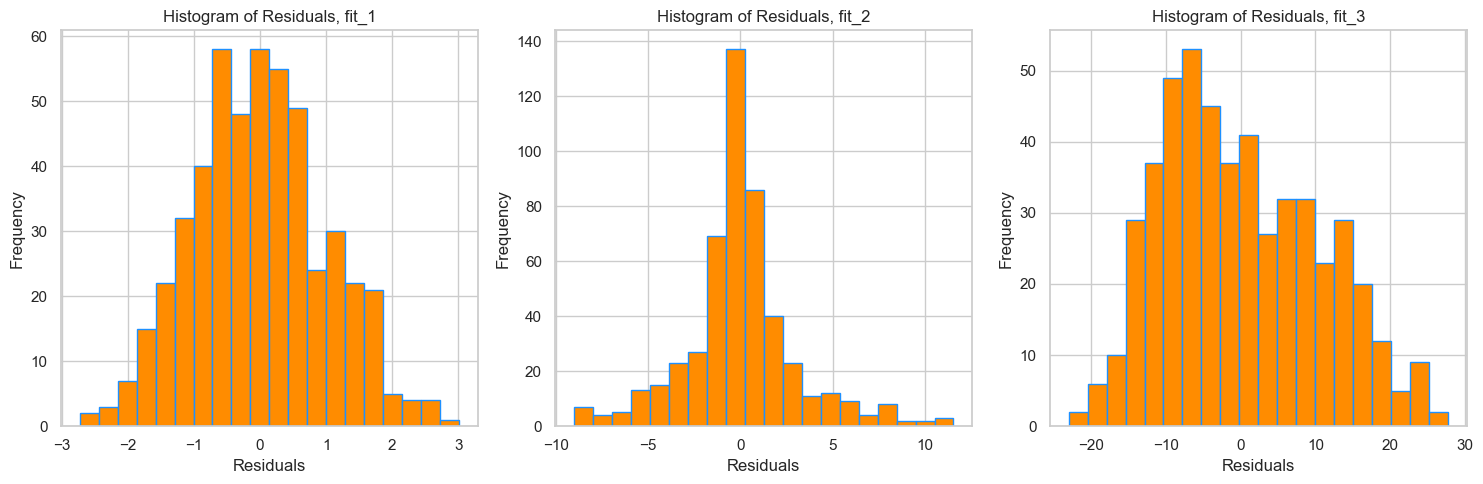

In [9]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

def plot_residual_histogram(model, title):
    residuals = model.resid
    plt.hist(residuals, bins=20, color='darkorange', edgecolor='dodgerblue')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title(title)

# Fitting models
sim_data_1 = sim_1()
model_1 = smf.ols('y ~ x', data=sim_data_1).fit()

sim_data_2 = sim_2()
model_2 = smf.ols('y ~ x', data=sim_data_2).fit()

sim_data_3 = sim_3()
model_3 = smf.ols('y ~ x', data=sim_data_3).fit()

# Plotting
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plot_residual_histogram(model_1, 'Histogram of Residuals, fit_1')

plt.subplot(1, 3, 2)
plot_residual_histogram(model_2, 'Histogram of Residuals, fit_2')

plt.subplot(1, 3, 3)
plot_residual_histogram(model_3, 'Histogram of Residuals, fit_3')

plt.tight_layout()
plt.show()



Arriba están los histogramas para cada uno de los tres modelos de regresión que hemos estado considerando. Observe que el primero, para `fit_1` parece muy normal. El tercero, para `fit_3`, parece muy poco normal. Sin embargo, `fit_2` no está tan claro. Tiene forma de campana, pero también presenta un pico muy agudo. Por este motivo, normalmente utilizaremos herramientas más potentes como **los gráficos Q-Q** y la prueba **Shapiro-Wilk** para evaluar la normalidad de los errores.



### Gráficos Q-Q

Otro método visual para evaluar la normalidad de los errores, que es más potente que un histograma, es un gráfico normal cuantil-cuantil, o **gráfico Q-Q** para abreviar.

En `Python` son muy fáciles de hacer. Simplemente importe la función `qqplot` del paquete `statsmodels.graphics.gofplots`.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


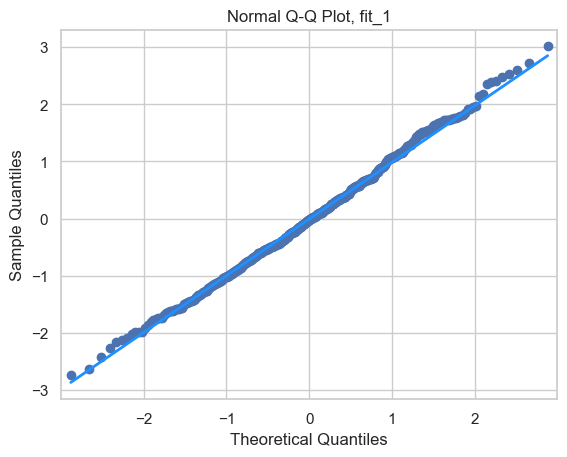

In [10]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming model_1 is already fit from the previous code
residuals_1 = model_1.resid

# Q-Q plot
sm.qqplot(residuals_1, line='q', color='darkgrey', marker='o')
plt.title('Normal Q-Q Plot, fit_1')
plt.gca().get_lines()[1].set_color('dodgerblue')
plt.gca().get_lines()[1].set_linewidth(2)
plt.show()



En resumen, si los puntos del gráfico no siguen de cerca una línea recta, esto sugeriría que los datos no proceden de una distribución normal.

Los cálculos necesarios para crear el gráfico varían en función de la implementación, pero esencialmente el eje $y$ son los datos ordenados (observados, o cuantiles de muestra), y el eje $x$ son los valores que esperaríamos si los datos procedieran de una distribución normal (cuantiles teóricos).

Además, para tener una mejor idea de cómo funcionan los gráficos Q-Q, aquí hay una función rápida que crea un gráfico Q-Q:


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot

def qq_plot(residuals):
    n = len(residuals)
    normal_quantiles = norm.ppf((np.arange(1, n + 1) - 0.5) / n)
    sorted_residuals = np.sort(residuals)

    plt.scatter(normal_quantiles, sorted_residuals, color='darkgrey')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.title('Normal Q-Q Plot')
    
    # Calculate line through the first and third quartiles
    slope, intercept = np.polyfit(
        norm.ppf([0.25, 0.75]), 
        np.quantile(residuals, [0.25, 0.75]), 
        deg=1
    )
    
    x = np.linspace(min(normal_quantiles), max(normal_quantiles), 100)
    plt.plot(x, intercept + slope * x, 'dodgerblue', linestyle='dashed', linewidth=2)
    plt.show()





A continuación, podemos comprobar que es esencialmente equivalente a utilizar `probplot()` y `qq_plot()` en `Python`.


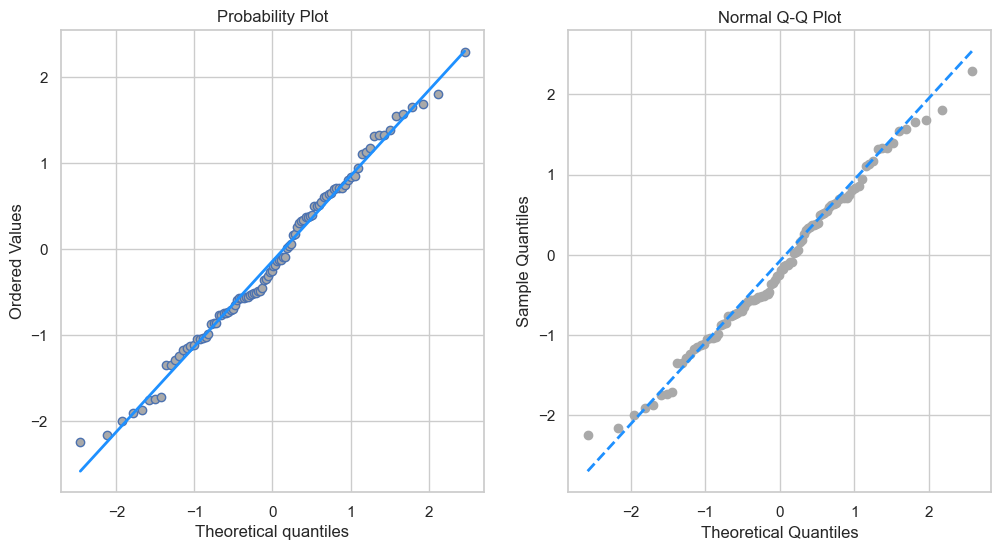

<Figure size 640x480 with 0 Axes>

In [12]:
np.random.seed(420)
x = np.random.normal(loc=0, scale=1, size=100)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
probplot(x, plot=plt)
plt.gca().get_lines()[0].set_markerfacecolor('darkgrey')
plt.gca().get_lines()[1].set_color('dodgerblue')
plt.gca().get_lines()[1].set_linewidth(2)

plt.subplot(1, 2, 2)
qq_plot(x)

plt.tight_layout()
plt.show()


Para hacernos una mejor idea de lo que significa "acercarse a la línea", realizamos varias simulaciones y creamos gráficos Q-Q.

Primero simulamos datos de una distribución normal con diferentes tamaños de muestra y cada vez creamos un gráfico Q-Q.


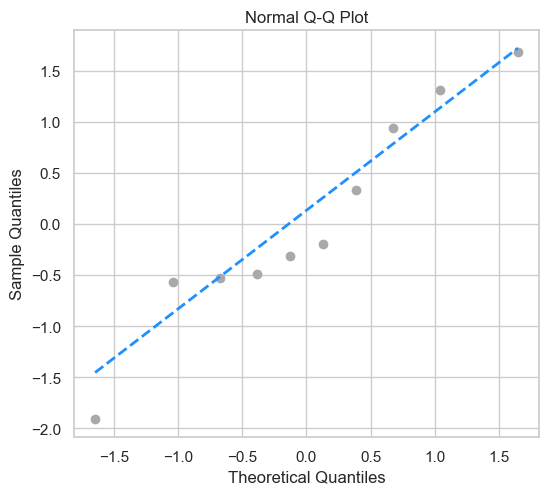

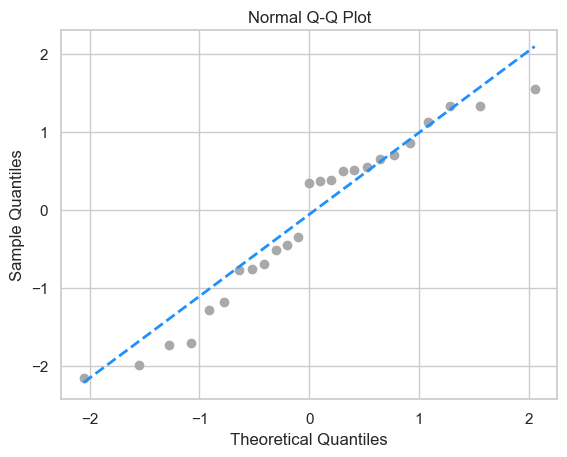

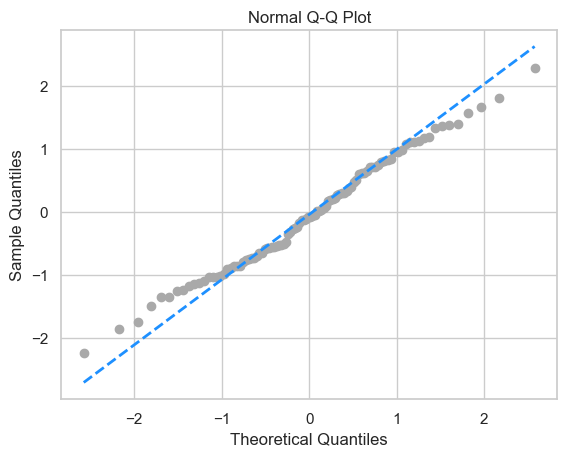

<Figure size 640x480 with 0 Axes>

In [13]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(420)

fig = plt.figure(figsize=(6, 18))  # Adjust the first value for width, and the second for height of the overall figure

# Creating Axes objects (i.e., subplots) with consistent sizes
ax1 = fig.add_subplot(3, 1, 1)  # 3 rows, 1 column, first plot
qq_plot(np.random.normal(size=10))
plt.xlim(-3, 3)  # Setting x-axis limits
plt.ylim(-3, 3)  # Setting y-axis limits
plt.clf()  # Clear the figure created inside qq_plot

ax2 = fig.add_subplot(3, 1, 2)  # 3 rows, 1 column, second plot
qq_plot(np.random.normal(size=25))
plt.xlim(-3, 3)  # Setting x-axis limits
plt.ylim(-3, 3)  # Setting y-axis limits
plt.clf()  # Clear the figure created inside qq_plot

ax3 = fig.add_subplot(3, 1, 3)  # 3 rows, 1 column, third plot
qq_plot(np.random.normal(size=100))
plt.xlim(-3, 3)  # Setting x-axis limits
plt.ylim(-3, 3)  # Setting y-axis limits
plt.clf()  # Clear the figure created inside qq_plot

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()



Dado que estos datos **son** muestras de una distribución normal, todos ellos son, por definición, buenos gráficos Q-Q. Los puntos están "cerca de la línea" y concluiríamos que estos datos podrían haber sido muestreados a partir de una distribución normal. Observe que en el primer gráfico, un punto está *algo* lejos de la línea, pero un solo punto, en combinación con el pequeño tamaño de la muestra, no es suficiente para preocuparnos. Vemos que con el gran tamaño de la muestra, todos los puntos están bastante cerca de la línea.

A continuación, simulamos los datos de una distribución $t$ con pocos grados de libertad, para diferentes tamaños de muestra.


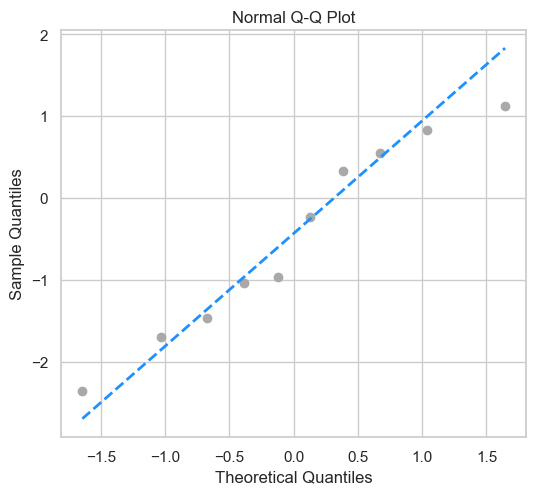

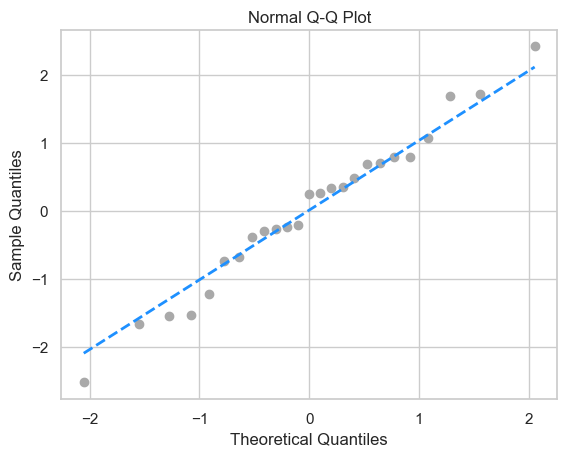

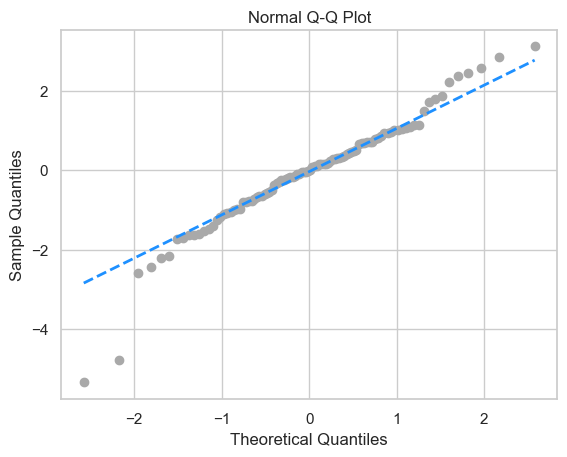

<Figure size 640x480 with 0 Axes>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

np.random.seed(420)

fig = plt.figure(figsize=(6, 18))  # Adjust the first value for width, and the second for height of the overall figure

# Creating Axes objects (i.e., subplots) with consistent sizes
ax1 = fig.add_subplot(3, 1, 1)  # 3 rows, 1 column, first plot
qq_plot(t.rvs(df=4, size=10))
plt.xlim(-3, 3)  # Setting x-axis limits
plt.ylim(-3, 3)  # Setting y-axis limits
plt.clf()  # Clear the figure created inside qq_plot

ax2 = fig.add_subplot(3, 1, 2)  # 3 rows, 1 column, second plot
qq_plot(t.rvs(df=4, size=25))
plt.xlim(-3, 3)  # Setting x-axis limits
plt.ylim(-3, 3)  # Setting y-axis limits
plt.clf()  # Clear the figure created inside qq_plot

ax3 = fig.add_subplot(3, 1, 3)  # 3 rows, 1 column, third plot
qq_plot(t.rvs(df=4, size=100))
plt.xlim(-3, 3)  # Setting x-axis limits
plt.ylim(-3, 3)  # Setting y-axis limits
plt.clf()  # Clear the figure created inside qq_plot

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


Recordemos que a medida que aumentan los grados de libertad de una distribución $t$, la distribución se parece cada vez más a una normal. Aquí, utilizando 4 grados de libertad, tenemos una distribución que es algo normal, es simétrica y aproximadamente en forma de campana, sin embargo tiene "colas gordas". Esto se presenta claramente en el tercer panel. Aunque muchos de los puntos están cerca de la línea, en los bordes hay grandes discrepancias. Esto indica que los valores son demasiado pequeños (negativos) o demasiado grandes (positivos) en comparación con lo que cabría esperar de una distribución normal. Por tanto, para el tamaño de muestra de `100`, llegaríamos a la conclusión de que se incumple el supuesto de normalidad. (Si se tratara de residuos de un modelo.) Para tamaños de muestra de `10` y `25` podríamos sospechar, pero no estar totalmente seguros. Leer gráficos Q-Q es un arte, no una ciencia.

A continuación, simulamos los datos a partir de una distribución exponencial.


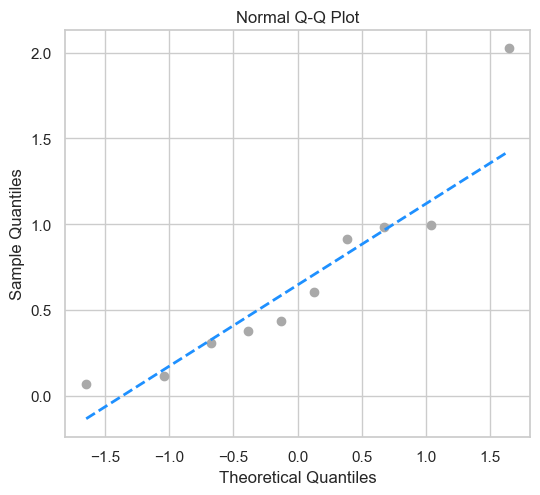

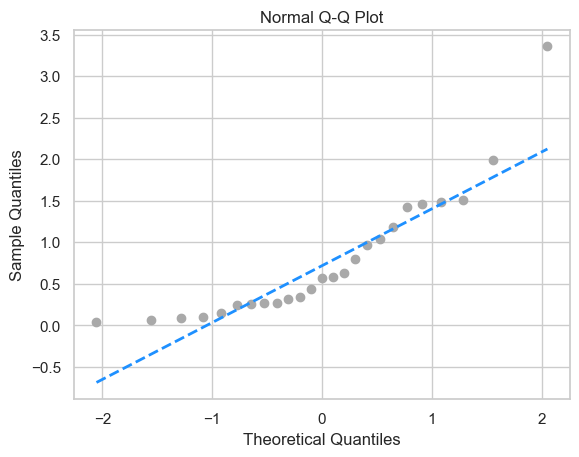

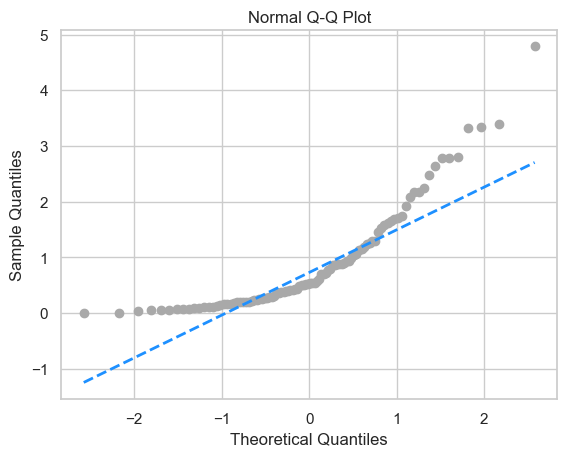

<Figure size 640x480 with 0 Axes>

In [15]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(420)

fig = plt.figure(figsize=(6, 18))  # Adjust the first value for width, and the second for height of the overall figure

# Creating Axes objects (i.e., subplots) with consistent sizes
ax1 = fig.add_subplot(3, 1, 1)  # 3 rows, 1 column, first plot
qq_plot(np.random.exponential(size=10))
plt.xlim(-3, 3)  # Setting x-axis limits
plt.ylim(-3, 3)  # Setting y-axis limits
plt.clf()  # Clear the figure created inside qq_plot

ax2 = fig.add_subplot(3, 1, 2)  # 3 rows, 1 column, second plot
qq_plot(np.random.exponential(size=25))
plt.xlim(-3, 3)  # Setting x-axis limits
plt.ylim(-3, 3)  # Setting y-axis limits
plt.clf()  # Clear the figure created inside qq_plot

ax3 = fig.add_subplot(3, 1, 3)  # 3 rows, 1 column, third plot
qq_plot(np.random.exponential(size=100))
plt.xlim(-3, 3)  # Setting x-axis limits
plt.ylim(-3, 3)  # Setting y-axis limits
plt.clf()  # Clear the figure created inside qq_plot

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


Esta es una distribución que no se parece mucho a una normal, por lo que en los tres casos, vemos puntos que están lejos de las líneas, por lo que podríamos pensar que se viola el supuesto de normalidad.

Para comprender mejor qué gráficos Q-Q son "buenos", repita las simulaciones anteriores varias veces (sin establecer la semilla) y preste atención a las diferencias entre los que se simulan a partir de la normal y los que no. Considere también diferentes tamaños de muestra y parámetros de distribución.

Volviendo a nuestras tres regresiones, recuerde,

- `fit_1` no violaba los supuestos,
- `fit_2` violó el supuesto de varianza constante, pero no la linealidad,
- `fit_3` violó la linealidad, pero no la varianza constante.

Ahora vamos a crear un gráfico Q-Q para cada uno para evaluar la normalidad de los errores.



Para `fit_1`, tenemos un gráfico Q-Q casi perfecto. Creemos que los errores siguen una distribución normal.


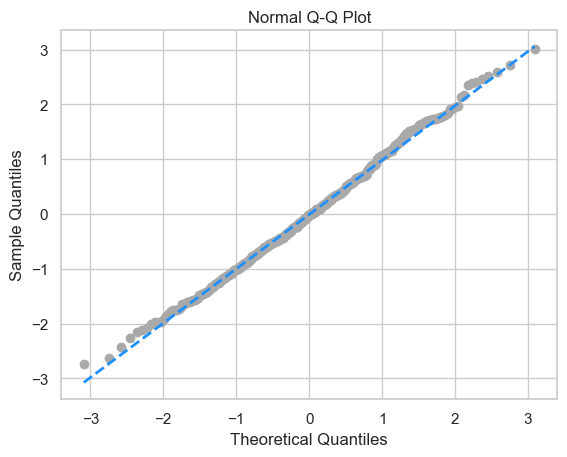

In [16]:
# For residuals of previously fit models
qq_plot(model_1.resid)



Para `fit_2`, tenemos un gráfico Q-Q sospechoso. Probablemente **no** creamos que los errores siguen una distribución normal.


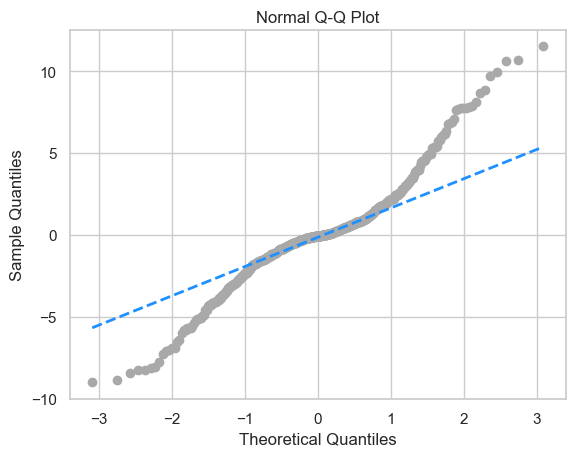

In [17]:

qq_plot(model_2.resid)



Por último, para `fit_3`, volvemos a tener un gráfico Q-Q sospechoso. Probablemente **no** creamos que los errores siguen una distribución normal.


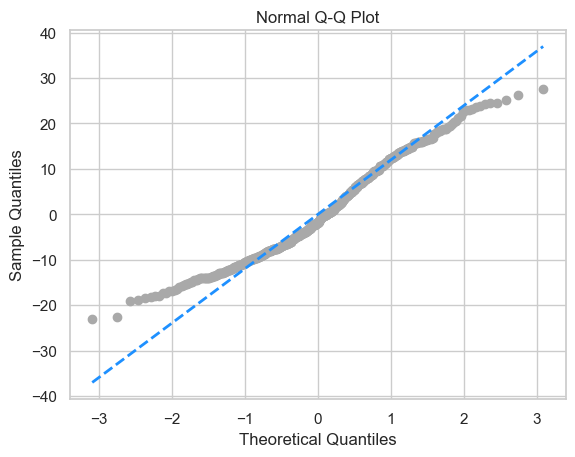

In [18]:

qq_plot(model_3.resid)


### Prueba de Shapiro-Wilk

Los histogramas y los gráficos Q-Q ofrecen una buena representación visual de la distribución de los residuos. distribución de los residuos, sin embargo si estamos interesados en pruebas formales, hay varias opciones disponibles. Una prueba comúnmente utilizada es la **Shapiro-Wilk**, que se implementa en `Python`.


In [19]:
import numpy as np
import scipy.stats as stats

# Set seed for reproducibility
np.random.seed(42)

# Perform Shapiro-Wilk test for normality on different datasets
print("Shapiro-Wilk Test on standard normal distribution:", stats.shapiro(np.random.normal(size=25)))
print("Shapiro-Wilk Test on exponential distribution:", stats.shapiro(np.random.exponential(size=25)))

Shapiro-Wilk Test on standard normal distribution: ShapiroResult(statistic=0.9696140885353088, pvalue=0.6352972388267517)
Shapiro-Wilk Test on exponential distribution: ShapiroResult(statistic=0.8586251139640808, pvalue=0.0025791579391807318)



Esto nos da el valor de la estadística de prueba y su valor p. La hipótesis nula supone que los datos se muestrearon a partir de una distribución normal, por lo que un valor p pequeño indica que creemos que sólo hay una pequeña probabilidad de que los datos se hayan muestreado a partir de una distribución normal.

Para más detalles, véase:
<a href="https://en.wikipedia.org/wiki/Shapiro-Wilk_test"
target="_blank">Wikipedia: Shapiro–Wilk test.</a>

En los ejemplos anteriores, vemos que fallamos en rechazar para los datos muestreados de normal, y rechazamos en los datos no normales, para cualquier $\alpha$ razonable.

Volviendo de nuevo a `fit_1`, `fit_2`, y `fit_3`, vemos que el resultado de ejecutar `shapiro.test()` en los residuos de cada uno, devuelve un resultado para cada uno que coincide con las decisiones basadas en los gráficos Q-Q.


In [20]:
import numpy as np
import scipy.stats as stats


print("Shapiro-Wilk Test on residuals of fit_1:", stats.shapiro(model.resid))
print("Shapiro-Wilk Test on residuals of fit_2:", stats.shapiro(model2.resid))
print("Shapiro-Wilk Test on residuals of fit_3:", stats.shapiro(model3.resid))


Shapiro-Wilk Test on residuals of fit_1: ShapiroResult(statistic=0.9968410134315491, pvalue=0.441923052072525)
Shapiro-Wilk Test on residuals of fit_2: ShapiroResult(statistic=0.9438427090644836, pvalue=8.081862002545792e-13)
Shapiro-Wilk Test on residuals of fit_3: ShapiroResult(statistic=0.9722673296928406, pvalue=3.9785284400295495e-08)



## Observaciones inusuales

Además de comprobar los supuestos de la regresión, también buscamos cualquier "observación inusual" en los datos. A menudo, un pequeño número de puntos de datos puede tener una influencia extremadamente grande en una regresión, a veces tanto que los supuestos de regresión se violan como resultado de estos puntos.

Los tres gráficos siguientes se inspiran en un ejemplo de <a href="http://www.maths.bath.ac.uk/~jjf23/LMR/" target="_blank">Modelos lineales con R</a>.


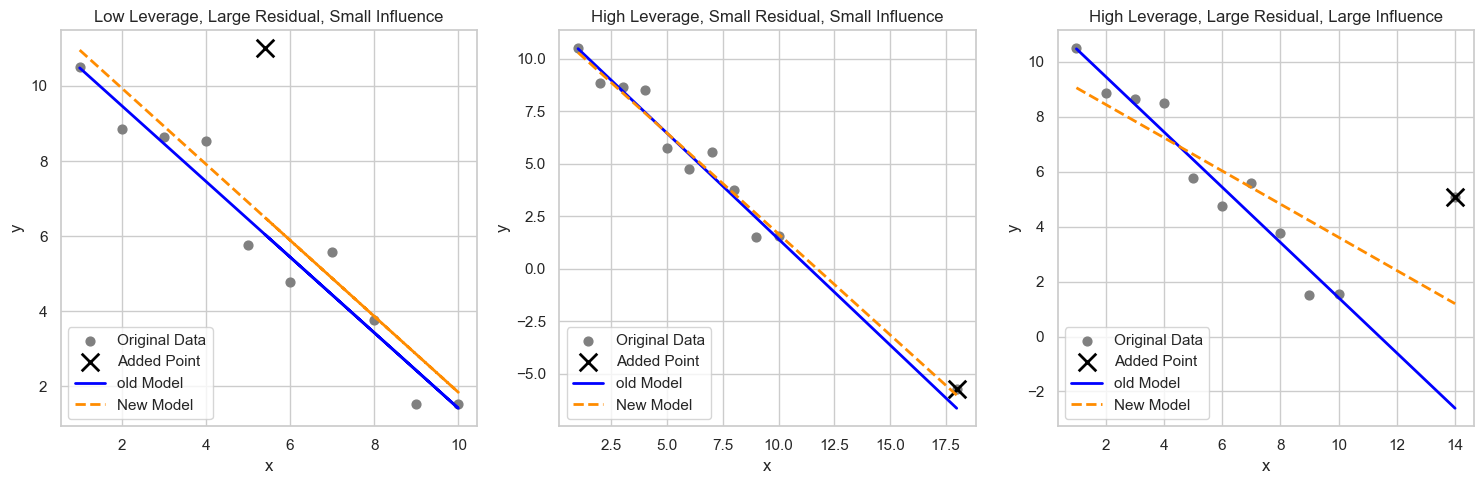

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

# Set seed for reproducibility
np.random.seed(42)

# Create the initial dataset
ex_data = pd.DataFrame({'x': range(1, 11),
                        'y': np.arange(10, 0, -1) + np.random.normal(size=10)})

# Fit the initial linear model
ex_model = sm.OLS(ex_data['y'], sm.add_constant(ex_data['x'])).fit()

# Define points to add
point_1 = pd.DataFrame({'x': [5.4], 'y': [11]})
point_2 = pd.DataFrame({'x': [18], 'y': [-5.7]})
point_3 = pd.DataFrame({'x': [14], 'y': [5.1]})

# Initialize subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Low Leverage, Large Residual, Small Influence
ex_data_1 = pd.concat([ex_data, point_1], ignore_index=True)
model_1 = sm.OLS(ex_data_1['y'], sm.add_constant(ex_data_1['x'])).fit()
axs[0].scatter(ex_data['x'], ex_data['y'], c='grey', s=40, label='Original Data')
axs[0].scatter(point_1['x'], point_1['y'], c='black', s=160, marker='x', label='Added Point', linewidth=2)
axs[0].plot(ex_data_1['x'], ex_model.predict(sm.add_constant(ex_data_1['x'])), color='blue', linestyle='-', linewidth=2, label='old Model')
axs[0].plot(ex_data_1['x'], model_1.predict(sm.add_constant(ex_data_1['x'])), color='darkorange', linestyle='--', linewidth=2, label='New Model')
axs[0].set_title('Low Leverage, Large Residual, Small Influence')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

# High Leverage, Small Residual, Small Influence
ex_data_2 = pd.concat([ex_data, point_2], ignore_index=True)
model_2 = sm.OLS(ex_data_2['y'], sm.add_constant(ex_data_2['x'])).fit()
axs[1].scatter(ex_data_2['x'], ex_data_2['y'], c='grey', s=40, label='Original Data')
axs[1].scatter(point_2['x'], point_2['y'], c='black', s=160, marker='x', label='Added Point', linewidth=2)
axs[1].plot(ex_data_2['x'], ex_model.predict(sm.add_constant(ex_data_2['x'])), color='blue', linestyle='-', linewidth=2, label='old Model')
axs[1].plot(ex_data_2['x'], model_2.predict(sm.add_constant(ex_data_2['x'])), color='darkorange', linestyle='--', linewidth=2, label='New Model')
axs[1].set_title('High Leverage, Small Residual, Small Influence')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

# High Leverage, Large Residual, Large Influence
ex_data_3 = pd.concat([ex_data, point_3], ignore_index=True)
model_3 = sm.OLS(ex_data_3['y'], sm.add_constant(ex_data_3['x'])).fit()
axs[2].scatter(ex_data_3['x'], ex_data_3['y'], c='grey', s=40, label='Original Data')
axs[2].scatter(point_3['x'], point_3['y'], c='black', s=160, marker='x', label='Added Point', linewidth=2)
axs[2].plot(ex_data_3['x'], ex_model.predict(sm.add_constant(ex_data_3['x'])), color='blue', linestyle='-', linewidth=2, label='old Model')
axs[2].plot(ex_data_3['x'], model_3.predict(sm.add_constant(ex_data_3['x'])), color='darkorange', linestyle='--', linewidth=2, label='New Model')
axs[2].set_title('High Leverage, Large Residual, Large Influence')
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')

# Add legends
axs[0].legend(loc='lower left')
axs[1].legend(loc='lower left')
axs[2].legend(loc='lower left')

plt.tight_layout()
plt.show()


La línea continua azul de cada gráfico es un ajuste de regresión a los 10 puntos de datos originales almacenados en ex_data. La línea naranja discontinua de cada gráfico es el resultado de añadir un único punto a los datos originales de ex_data. Este punto adicional se indica con un círculo.

La pendiente de la regresión para los diez puntos originales, la línea azul continua, viene dada por:

In [22]:
ex_model.params[1]

-1.0069003716838811


El punto añadido en el primer gráfico tiene un efecto *pequeño* en la pendiente, que pasa a ser:


In [23]:
model_1.params[1]

-1.0123556921456858


Diremos que este punto tiene poca influencia, es un valor atípico debido a su gran residuo, pero tiene poca influencia.

El punto añadido en el segundo gráfico también tiene un *pequeño* efecto en la pendiente, que es:


In [24]:
model_2.params[1]

-0.9594209418078811


Diremos que este punto tiene un apalancamiento alto, no es un valor atípico debido a su pequeño residuo y tiene una influencia muy pequeña.

Por último, el punto añadido en el tercer gráfico tiene un efecto *grande* en la pendiente, que ahora es:


In [25]:
model_3.params[1]

-0.6048142833113597


Este punto añadido es influyente. Tiene un apalancamiento elevado y es un valor atípico debido a su gran residuo.

Ahora hemos mencionado tres nuevos conceptos: apalancamiento, valores atípicos y puntos influyentes, cada uno de los cuales trataremos en detalle.



### Apalancamiento

Un punto de datos con alto **apalancamiento**, es un punto de datos que *podría* tener una gran influencia al ajustar el modelo.

Recordemos que,

$$\hat{\beta} = \left(X^\top X \right)^{-1} X^\top y.$$

Así,

$$ \hat{y} = X \hat{\beta}   = X \left(X^\top X \right)^{-1} X^\top y$$

Ahora definimos,

$$H = X \left(X^\top X\right)^{-1} X^\top$$

que denominaremos *matriz sombrero*. La matriz sombrero se utiliza para proyectar sobre el subespacio abarcado por las columnas de $X$. También se conoce simplemente como matriz de proyección.

La matriz sombrero es una matriz que toma los valores originales de $y$ ¡y les añade un sombrero!

$$\hat{y} = H y$$

Los elementos diagonales de esta matriz se denominan **apalancamientos**.

$$H_{ii} = h_i,$$

donde $h_i$ es el apalancamiento de la observación $i$ésima.

Los valores grandes de $h_i$ indican valores extremos en $X$, que pueden influir en la regresión. Tenga en cuenta que los apalancamientos sólo dependen de $X$.

Aquí, $p$, el número de $\beta$s, es también la traza (y el rango) de la matriz sombrero.

$$ \sum_{i = 1}^n h_i = p $$

¿Cuál es el valor de $h_i$ que se consideraría grande? No hay una respuesta exacta a esta pregunta. Una heurística común sería comparar cada apalancamiento con dos veces el apalancamiento medio. Un apalancamiento superior a este valor se considera una observación a tener en cuenta. Es decir, si

$$ h_i > 2 \bar{h} $$

decimos que la observación $i$ tiene un gran apalancamiento. Aquí,

$$ \bar{h} = \frac{\sum_{i = 1}^n h_i}{n} = \frac{p}{n}.$$

Para la regresión lineal simple, el apalancamiento de cada punto viene dado por

$$h_i = \frac{1}{n} + \frac{(x_i - \bar{x})^2}{S_{xx}}.$$

Esta expresión debería resultarte familiar. (Sugiere que los grandes apalancamientos se producen cuando los valores de $x$ están lejos de su media. Recordemos que la regresión pasa por el punto $(\bar{x},\bar{y})$.

Hay varias maneras de encontrar apalancamientos en `Python`.


Text(0, 0.5, 'x2')

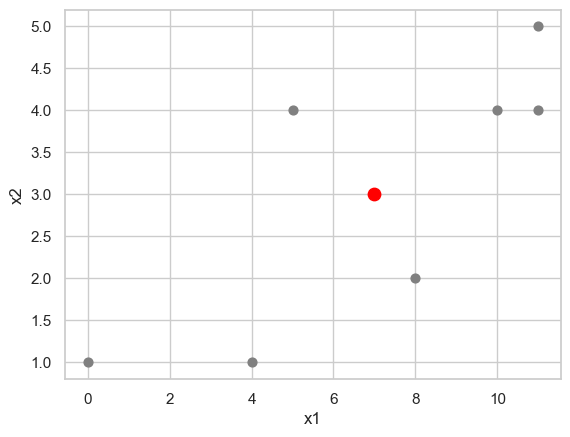

In [26]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Create the lev_ex DataFrame
lev_ex = pd.DataFrame({
    'x1': [0, 11, 11, 7, 4, 10, 5, 8],
    'x2': [1, 5, 4, 3, 1, 4, 4, 2],
    'y': [11, 15, 13, 14, 0, 19, 16, 8]
})

# Plot x2 vs. x1
lev_ex.plot.scatter(x='x1', y='x2', c='grey', s=40)
plt.scatter(7, 3, c='red', marker='o', s=80)
plt.xlabel('x1')
plt.ylabel('x2')


Aquí hemos creado algunos datos multivariantes. Observa que hemos trazado los valores $x$, no los valores $y$. El punto rojo es $(7, 3)$, que es la media de `x1` y la media de `x2` respectivamente.

Podríamos calcular los apalancamientos utilizando las expresiones definidas anteriormente. Primero creamos la matriz $X$, luego calculamos $H$ como se ha definido, y extraemos los elementos diagonales.


In [27]:
# Create design matrix X
X = sm.add_constant(lev_ex[['x1', 'x2']])

# Calculate the hat matrix H
H = np.dot(np.dot(X, np.linalg.inv(np.dot(X.T, X))), X.T)

# Diagonal of the hat matrix
diag_H = np.diag(H)
print(diag_H)

[0.6    0.375  0.2875 0.125  0.4    0.2125 0.5875 0.4125]



Tenga en cuenta aquí, tenemos dos predictores, por lo que la regresión tendría 3 $\beta$ parámetros, por lo que la suma de los elementos diagonales es 3.


In [28]:
# Sum of diagonal elements
sum_diag_H = np.sum(diag_H)
print(sum_diag_H)

3.000000000000001



Alternativamente, el método que utilizaremos más a menudo, es simplemente ajustar una regresión, y luego utilizar la función `hatvalues()`, que devuelve los apalancamientos.


In [29]:
# Fit a linear model
lev_fit = smf.ols(formula='y ~ x1 + x2', data=lev_ex).fit()

In [30]:
# Hat values
hat_values = lev_fit.get_influence().hat_matrix_diag
print(hat_values)

[0.6    0.375  0.2875 0.125  0.4    0.2125 0.5875 0.4125]



De nuevo, observe que aquí hemos "utilizado" los valores $y$ para ajustar la regresión, pero `Python` sigue ignorándolos al calcular los apalancamientos, ya que los apalancamientos sólo dependen de los valores $x$.


In [31]:
# Coefficients of the linear model
coefficients = lev_fit.params
print(coefficients)


Intercept    3.7
x1          -0.7
x2           4.4
dtype: float64



Veamos qué ocurre con estos coeficientes cuando modificamos el valor `y` del punto con mayor palanca.


In [32]:
# Index of the observation with the maximum hat value
max_hat_index = np.argmax(hat_values)
print(max_hat_index)

0


In [33]:
# Observation with the maximum hat value
obs_max_hat = lev_ex.iloc[max_hat_index]
print(obs_max_hat)

x1     0
x2     1
y     11
Name: 0, dtype: int64



Vemos que el valor `y` original es 11. Vamos a crear una copia de los datos, y modificar este punto para tener un valor `y` de `20`.


In [34]:
# Create a modified copy of lev_ex with y[1] = 20
lev_ex_1 = lev_ex.copy()
lev_ex_1.loc[0, 'y'] = 20

In [35]:
# Fit a linear model with the modified data
lev_fit_1 = smf.ols(formula='y ~ x1 + x2', data=lev_ex_1).fit()


Observa los **grandes** cambios en los coeficientes. Observe también que cada uno de los coeficientes ha cambiado de alguna manera. Nótese que los apalancamientos de los puntos no habrían cambiado, ya que no hemos modificado ninguno de los valores $x$.

Veamos ahora qué ocurre con estos coeficientes cuando modificamos el valor `y` del punto con menor apalancamiento.


In [36]:
# Index of the observation with the minimum hat value
min_hat_index = np.argmin(hat_values)
print(min_hat_index)

3


In [37]:
# Observation with the minimum hat value
obs_min_hat = lev_ex.iloc[min_hat_index]
print(obs_min_hat)


x1     7
x2     3
y     14
Name: 3, dtype: int64



Vemos que el valor `y` original es 14. Crearemos de nuevo una copia de los datos, y modificaremos este punto para que tenga un valor `y` de `30`.


In [38]:
# Create a modified copy of lev_ex with y[4] = 30
lev_ex_2 = lev_ex.copy()
lev_ex_2.loc[3, 'y'] = 30

In [39]:
# Fit a linear model with the modified data
lev_fit_2 = smf.ols(formula='y ~ x1 + x2', data=lev_ex_2).fit()
print(lev_fit_2.params)

Intercept    5.7
x1          -0.7
x2           4.4
dtype: float64



Esta vez, a pesar de un gran cambio en el valor `y`, sólo hay un pequeño cambio en los coeficientes. Además, ¡sólo ha cambiado el intercepto!


In [40]:
mean_x1 = lev_ex['x1'].mean()
mean_x1

7.0

In [41]:
mean_x2 = lev_ex['x2'].mean()
mean_x2

3.0

In [42]:
# Observation at index 4
obs_4 = lev_ex.iloc[3]
print(obs_4)

x1     7
x2     3
y     14
Name: 3, dtype: int64



Obsérvese que este punto era la media de ambos predictores.

Volviendo a nuestros tres gráficos, cada uno con un punto añadido, podemos calcular los apalancamientos de cada uno. Obsérvese que el undécimo punto de datos es cada vez el punto de datos añadido.


In [43]:
# Hat values for model_1 , model_2 and model_3
hat_values_model_1 = model_1.get_influence().hat_matrix_diag

hat_values_model_1

array([0.33534597, 0.23860732, 0.16610842, 0.11784927, 0.09382988,
       0.09405024, 0.11851036, 0.16721022, 0.24014985, 0.33732922,
       0.09100926])

In [44]:
hat_values_model_2 = model_2.get_influence().hat_matrix_diag

hat_values_model_2

array([0.23238866, 0.18663968, 0.14979757, 0.12186235, 0.10283401,
       0.09271255, 0.09149798, 0.09919028, 0.11578947, 0.14129555,
       0.6659919 ])

In [45]:
hat_values_model_3 = model_3.get_influence().hat_matrix_diag

hat_values_model_3

array([0.27852761, 0.21411043, 0.16319018, 0.12576687, 0.10184049,
       0.09141104, 0.09447853, 0.11104294, 0.14110429, 0.18466258,
       0.49386503])


¿Alguno de ellos es grande?


In [46]:
# Check if hat values are greater than 2 times the mean hat value
is_high_leverage_model_1 = hat_values_model_1 > 2 * np.mean(hat_values_model_1)
is_high_leverage_model_2 = hat_values_model_2 > 2 * np.mean(hat_values_model_2)
is_high_leverage_model_3 = hat_values_model_3 > 2 * np.mean(hat_values_model_3)

In [47]:
print(is_high_leverage_model_1)
print(is_high_leverage_model_2)
print(is_high_leverage_model_3)

[False False False False False False False False False False False]
[False False False False False False False False False False  True]
[False False False False False False False False False False  True]



Vemos que en el segundo y el tercer gráfico, el punto añadido es un punto de apalancamiento elevado. Recordemos que sólo en el tercer gráfico influyó en la regresión. Para entender por qué, tendremos que discutir los valores atípicos.



### Valores atípicos

Los valores atípicos son puntos que no se ajustan bien al modelo. Pueden o no tener un gran efecto en el modelo. Para identificar los valores atípicos, buscaremos observaciones con residuos grandes.

Nota,

$$e = y - \hat{y} = Iy - Hy = (I - H) y$$

Entonces, bajo los supuestos de regresión lineal,

$$ \text{Var}(e_i) = (1 - h_i) \sigma^2$$

y así estimar $\sigma^2$ con $s_e^2$ da

$$\text{SE}[e_i] = s_e \sqrt{(1 - h_i)}.$$

Podemos entonces mirar el **residuo estandarizado** para cada observación, $i = 1, 2, \ldots n$,

$$ r_i = \frac{e_i}{s_e\sqrt{1 - h_i}} \overset{approx}{\sim} N(\mu = 0, \sigma^ 2 = 1)$$

cuando $n$ es grande.

Podemos utilizar este hecho para identificar residuos "grandes". Por ejemplo, los residuos normalizados de magnitud superior a 2 sólo deberían producirse aproximadamente el 5% de las veces.

Volviendo de nuevo a nuestros tres gráficos, cada uno con un punto añadido, podemos calcular los residuos y los residuos normalizados de cada uno. Los residuos normalizados pueden obtenerse en `Python` utilizando `rstandard()` donde normalmente utilizaríamos `resid()`.


In [48]:
# Residuals for model_1
residuals_model_1 = model_1.resid
print(residuals_model_1)

0    -0.457012
1    -1.079634
2    -0.281326
3     0.606371
4    -1.138456
5    -1.126084
6     0.699621
7    -0.099801
8    -1.324355
9    -0.299964
10    4.500639
dtype: float64


In [49]:
# Standardized residuals for model_1
std_residuals_model_1 = model_1.get_influence().resid_studentized_internal
print(std_residuals_model_1)

[-0.32373762 -0.71455583 -0.17791744  0.37284736 -0.69067754 -0.68325473
  0.4303465  -0.06315845 -0.87741313 -0.21280638  2.72620391]


In [50]:
# Outliers for model_1 (standardized residuals > 2)

outliers_1 = np.where(np.abs(std_residuals_model_1) > 2)[0]

print(outliers_1)


[10]



En el primer gráfico, vemos que el undécimo punto, el punto añadido, es un gran residuo normalizado.


In [51]:
# Residuals for model_2
residuals_model_2 = model_2.resid
print(residuals_model_2)

0     0.199922
1    -0.475635
2     0.269739
3     1.104501
4    -0.693261
5    -0.733824
6     1.038947
7     0.186590
8    -1.090899
9    -0.119443
10    0.313364
dtype: float64


In [52]:
# Standardized residuals for model_2
std_residuals_model_2 = model_2.get_influence().resid_studentized_internal
print(std_residuals_model_2)

[ 0.3063061  -0.70794147  0.39268736  1.58215744 -0.98248409 -1.03415204
  1.46317151  0.26389776 -1.5572971  -0.17302334  0.72783989]


In [53]:
# Outliers for model_2 (standardized residuals > 2)

outliers_2 = np.where(np.abs(std_residuals_model_2) > 2)[0]

print(outliers_2)

[]



En el segundo gráfico, vemos que no hay puntos con residuos normalizados grandes.


In [54]:
# Residuals for model_3
residuals_model_3 = model_3.resid
print(residuals_model_3)

0     1.436729
1     0.406565
2     0.797332
3     1.277487
4    -0.874882
5    -1.270051
6     0.148113
7    -1.058851
8    -2.690946
9    -2.074097
10    3.902600
dtype: float64


In [55]:
# Standardized residuals for model_3
std_residuals_model_3 = model_3.get_influence().resid_studentized_internal
print(std_residuals_model_3)

[ 0.86029194  0.23325432  0.44330903  0.69490253 -0.46951936 -0.67767014
  0.07916351 -0.571183   -1.4767794  -1.16826475  2.78998477]


In [56]:
# Outliers for model_3 (standardized residuals > 2)

outliers_3 = np.where(np.abs(std_residuals_model_3) > 2)[0]

print(outliers_3)

[10]



En el último gráfico, vemos que el undécimo punto, el punto añadido, es un residuo normalizado grande.

Recordemos que los puntos añadidos de los gráficos dos y tres eran ambos de alto apalancamiento, pero ahora sólo el punto del gráfico tres tiene un residuo grande. Ahora combinaremos esta información y discutiremos la influencia.



### Influencia

Como hemos visto en los tres gráficos, algunos valores atípicos sólo cambian ligeramente la regresión (gráfico uno) y otros tienen un gran efecto en la regresión (gráfico tres). Las observaciones que caen en esta última categoría, puntos con (alguna combinación de) *alto apalancamiento* **y** *gran residuo*, las llamaremos **influyentes**.

Una medida común de influencia es la **distancia de Cook**, que se define como

$$ D_i = \frac{1}{p}r_i^2\frac{h_i}{1-{h_i}}.$$

Observe que es una función tanto del *apalancamiento* como de los *residuos normalizados*.

A menudo se considera que una distancia de Cook es grande si

$$D_i > \frac{4}{n}$$

y una observación con una gran distancia de Cook se denomina influyente. De nuevo, se trata simplemente de una heurística y no de una regla exacta.

La distancia de Cook para cada punto de una regresión se puede calcular utilizando `cooks.distance()` que es una función por defecto en `Python`. Busquemos puntos influyentes en los tres gráficos que hemos estado considerando.



\`\`\`{r, ref.label=“unusual_obs_plot”, fig.height = 5, fig.width = 15,
echo = FALSE}




Recuerde que los puntos marcados con un círculo en cada gráfico tienen características diferentes:
- Primer gráfico: apalancamiento bajo, residuo grande.
- Gráfico 2: apalancamiento alto, residuo pequeño.
- Tercer gráfico: apalancamiento alto, residuo grande.
Ahora comprobaremos directamente si cada uno de ellos es influyente.


In [60]:
from statsmodels.stats.outliers_influence import OLSInfluence

# Calculate Cook's distance for model_1, model_2, and model_3
cooks_distance_1 = model_1.get_influence().cooks_distance
cooks_distance_2 = model_2.get_influence().cooks_distance
cooks_distance_3 = model_3.get_influence().cooks_distance

# Calculate the threshold for Cook's distance using the length of cooks_distance_1[0]
n = len(cooks_distance_1[0])
threshold = 4 / n

# Check if the Cook's distance for the 11th observation exceeds the threshold for each model
is_outlier_model_1 = cooks_distance_1[0][10] > threshold
is_outlier_model_2 = cooks_distance_2[0][10] > threshold
is_outlier_model_3 = cooks_distance_3[0][10] > threshold

print("Is 11th observation an outlier in model_1?", is_outlier_model_1)
print("Is 11th observation an outlier in model_2?", is_outlier_model_2)
print("Is 11th observation an outlier in model_3?", is_outlier_model_3)


Is 11th observation an outlier in model_1? True
Is 11th observation an outlier in model_2? True
Is 11th observation an outlier in model_3? True


In [61]:
cooks_distance_1[0]


array([0.02643953, 0.08000505, 0.00315275, 0.00928573, 0.02469745,
       0.0242321 , 0.01244932, 0.00040046, 0.12165574, 0.01152645,
       0.37205982])


Y, como era de esperar, el punto añadido en el tercer gráfico, con un apalancamiento alto y un residuo grande, ¡se considera influyente!



## Ejemplos de análisis de datos



### Buenos diagnósticos

En el capítulo anterior ajustamos una regresión aditiva a los datos de `mtcars` con `mpg` como respuesta y `hp` y `am` como predictores. Vamos a realizar algunos diagnósticos en este modelo.

En primer lugar, ajuste el modelo como lo hicimos en el capítulo anterior.


In [63]:
pip install pydataset

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 15.9/15.9 MB 392.8 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939417 sha256=5898ec5a096b237f08bf856f766d95dda3ffe8b1b58e8f9c1f2e85c6bd8d69af
  Stored in directory: c:\users\a.tabaresp\appdata\local\pip\cache\wheels\6b\86\a7\f71cb84c7bff804d83e293615a20c0531234397b796aee2645
Successfully built pydataset
Note: you may need to restart the kernel to use updated packages.


In [64]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
import numpy as np

# Since mtcars is an R dataset, we need to import it separately
from pydataset import data
mtcars = data('mtcars')


initiated datasets repo at: C:\Users\a.tabaresp\.pydataset/


In [65]:
mpg_hp_add = smf.ols('mpg ~ hp + am', data=mtcars).fit()


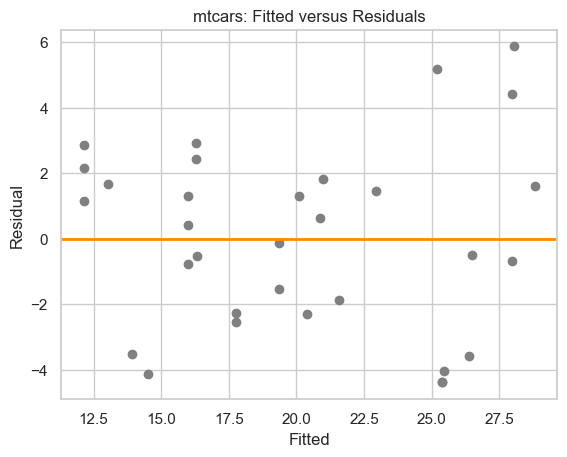

In [66]:
plt.scatter(mpg_hp_add.fittedvalues, mpg_hp_add.resid, color='grey')
plt.axhline(y=0, color='darkorange', linewidth=2)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('mtcars: Fitted versus Residuals')
plt.show()



El gráfico de ajuste frente a los residuos tiene buen aspecto. No vemos ningún patrón obvio, y la varianza parece más o menos constante. (Quizá un poco mayor para valores ajustados grandes, pero no lo suficiente como para preocuparse).


In [67]:
bp_test = sm.stats.diagnostic.het_breuschpagan(mpg_hp_add.resid, mpg_hp_add.model.exog)
print(f'BP test statistic: {bp_test[0]}')
print(f'BP test p-value: {bp_test[1]}')


BP test statistic: 7.585795388761319
BP test p-value: 0.02253022147453308



La prueba de Breusch-Pagan lo verifica, al menos para un valor $\alpha$ pequeño.


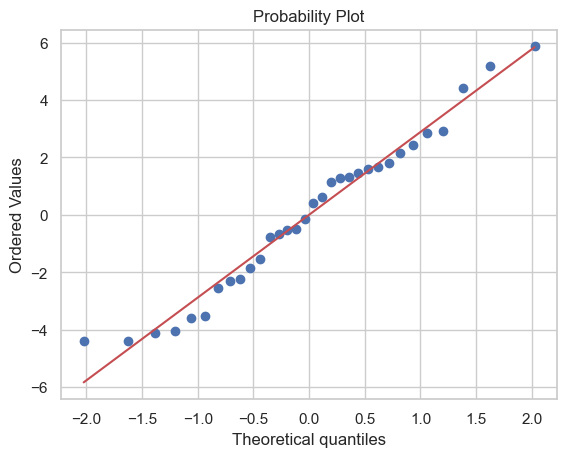

In [68]:
stats.probplot(mpg_hp_add.resid, plot=plt, fit=True)
plt.show()



El gráfico Q-Q tiene muy buen aspecto y la prueba de Shapiro Wilk está de acuerdo.


In [69]:
shapiro_test = stats.shapiro(mpg_hp_add.resid)
print(f'Shapiro test statistic: {shapiro_test[0]}')
print(f'Shapiro test p-value: {shapiro_test[1]}')


Shapiro test statistic: 0.9648544788360596
Shapiro test p-value: 0.3706476092338562



Vemos que hay dos puntos de gran apalancamiento.


In [70]:
hat_values = mpg_hp_add.get_influence().hat_matrix_diag
high_leverage_points = np.sum(hat_values > 2 * np.mean(hat_values))
print(high_leverage_points)


2


In [71]:
std_residuals = mpg_hp_add.get_influence().resid_studentized_internal
high_std_resid = np.sum(np.abs(std_residuals) > 2)
print(high_std_resid)


1



También hay un punto con un gran residuo. ¿Resultan puntos que se consideren influyentes?


In [72]:
cooks_d = mpg_hp_add.get_influence().cooks_distance[0]
influential_points = cooks_d > 4 / len(cooks_d)
print(np.sum(influential_points))




2



``` {r}
cd_mpg_hp_add = cooks.distance(mpg_hp_add)
sum(cd_mpg_hp_add > 4 / length(cd_mpg_hp_add))
large_cd_mpg = cd_mpg_hp_add > 4 / length(cd_mpg_hp_add)
cd_mpg_hp_add[large_cd_mpg]
```



Encontramos dos puntos influyentes. Curiosamente, son coches **muy** diferentes.


In [73]:

print(mpg_hp_add.params)

Intercept    26.584914
hp           -0.058888
am            5.277085
dtype: float64



Como los diagnósticos parecían buenos, no hay que preocuparse mucho por estos dos puntos, pero veamos cuánto cambian los coeficientes si los eliminamos.


In [74]:
# Filtering out influential points
filtered_data = mtcars.loc[~influential_points]

# Fitting the model again
mpg_hp_add_fix = smf.ols('mpg ~ hp + am', data=filtered_data).fit()
print(mpg_hp_add_fix.params)

Intercept    27.221909
hp           -0.062862
am            4.297659
dtype: float64



Parece que no hay grandes cambios en los coeficientes como resultado de la eliminación de los supuestos puntos influyentes. 

eval_env: 1


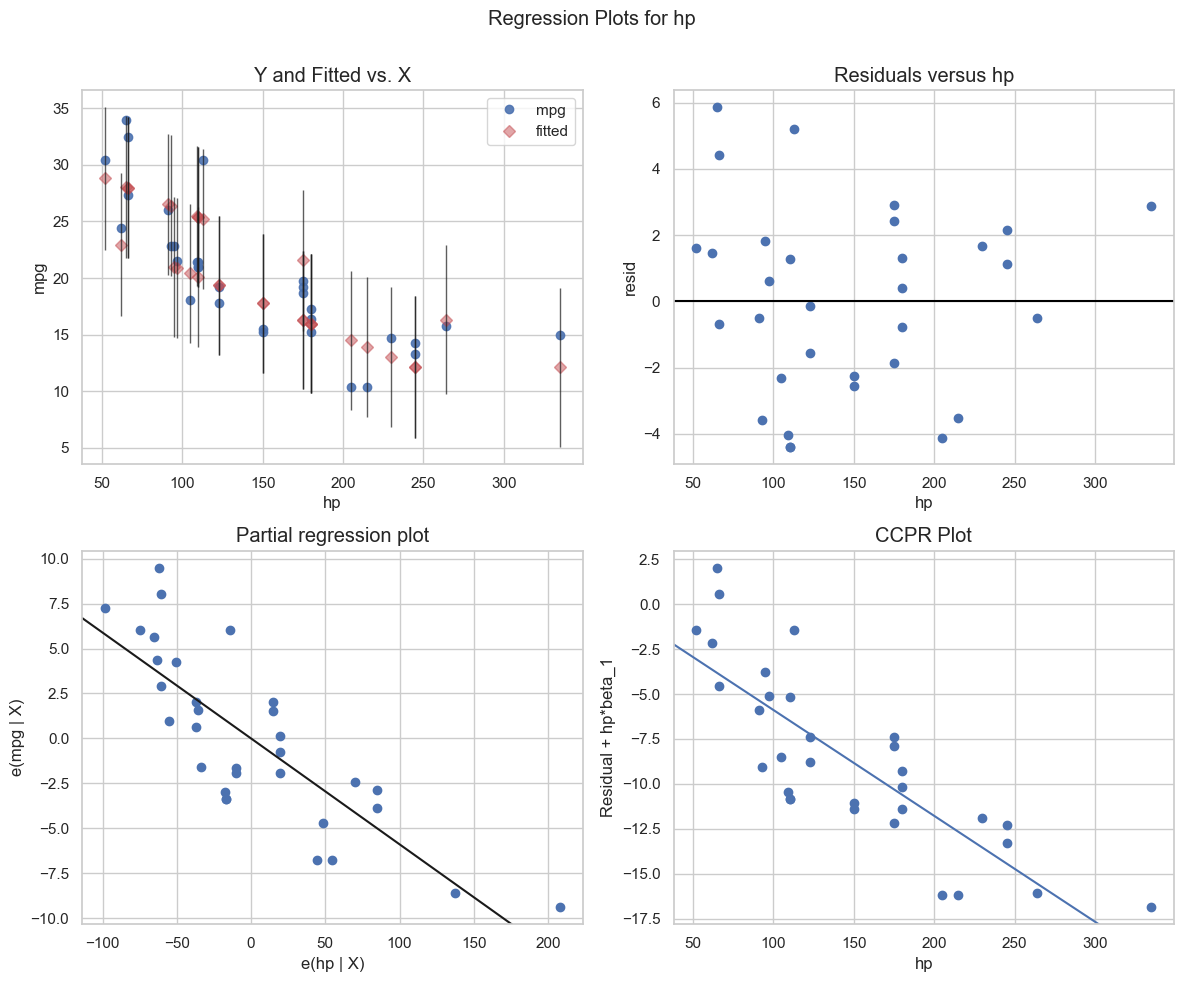

In [75]:
fig = plt.figure(figsize=(12,10))
fig = sm.graphics.plot_regress_exog(mpg_hp_add, 'hp', fig=fig)
plt.show()


In [76]:

# base code
import statsmodels
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type

style_talk = 'seaborn-talk'    #refer to plt.style.available

class LinearRegDiagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance
        d. outliers
        e. high-leverage points
        f. collinearity

    Authors:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)
        Does not come with any sort of warranty.
        Please test the code one your end before using.

        Matt Spinelli (m3spinelli@gmail.com, where 3 = r)
        (1) Fixed incorrect annotation of the top most extreme residuals in
            the Residuals vs Fitted and, especially, the Normal Q-Q plots.
        (2) Changed Residuals vs Leverage plot to match closer the y-axis
            range shown in the equivalent plot in the R package ggfortify.
        (3) Added horizontal line at y=0 in Residuals vs Leverage plot to
            match the plots in R package ggfortify and base R.
        (4) Added option for placing a vertical guideline on the Residuals
            vs Leverage plot using the rule of thumb of h = 2p/n to denote
            high leverage (high_leverage_threshold=True).
        (5) Added two more ways to compute the Cook's Distance (D) threshold:
            * 'baseR': D > 1 and D > 0.5 (default)
            * 'convention': D > 4/n
            * 'dof': D > 4 / (n - k - 1)
        (6) Fixed class name to conform to Pascal casing convention
        (7) Fixed Residuals vs Leverage legend to work with loc='best'
    """

    def __init__(self,
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table

        e. vif

        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]):
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        Example:
        >>> import numpy as np
        >>> import pandas as pd
        >>> import statsmodels.formula.api as smf
        >>> x = np.linspace(-np.pi, np.pi, 100)
        >>> y = 3*x + 8 + np.random.normal(0,1, 100)
        >>> df = pd.DataFrame({'x':x, 'y':y})
        >>> res = smf.ols(formula= "y ~ x", data=df).fit()
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls(plot_context="seaborn-paper")

        In case you do not need all plots you can also independently make an individual plot/table
        in following ways

        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls.residual_plot()
        >>> cls.qq_plot()
        >>> cls.scale_location_plot()
        >>> cls.leverage_plot()
        >>> cls.vif_table()
        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)
        self.nresids = len(self.residual_norm)

    def __call__(self, plot_context='seaborn-paper', **kwargs):
        # print(plt.style.available)
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(
                ax=ax[1,1],
                high_leverage_threshold = kwargs.get('high_leverage_threshold'),
                cooks_threshold = kwargs.get('cooks_threshold'))
            plt.show()

        return self.vif_table(), fig, ax,

    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.argsort(residual_abs), 0)
        abs_resid_top_3 = abs_resid[:3]
        for i in abs_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], self.residual[i]),
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax

    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        fig = QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for i, x, y in self.__qq_top_resid(QQ.theoretical_quantiles, abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(x, y),
                ha='right',
                color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax

    def scale_location_plot(self, ax=None):
        """
        Sqrt(Standarized Residual) vs Fitted values plot

        Used to check homoscedasticity of the residuals.
        Horizontal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict,
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residual_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], residual_norm_abs_sqrt[i]),
                color='C3')

        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None, high_leverage_threshold=False, cooks_threshold='baseR'):
        """
        Residual vs Leverage plot

        Points falling outside Cook's distance curves are considered observation that can sway the fit
        aka are influential.
        Good to have none outside the curves.
        """
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage,
            self.residual_norm,
            alpha=0.5);

        sns.regplot(
            x=self.leverage,
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        leverage_top_3 = np.flip(np.argsort(self.cooks_distance), 0)[:3]
        for i in leverage_top_3:
            ax.annotate(
                i,
                xy=(self.leverage[i], self.residual_norm[i]),
                color = 'C3')

        factors = []
        if cooks_threshold == 'baseR' or cooks_threshold is None:
            factors = [1, 0.5]
        elif cooks_threshold == 'convention':
            factors = [4/self.nresids]
        elif cooks_threshold == 'dof':
            factors = [4/ (self.nresids - self.nparams)]
        else:
            raise ValueError("threshold_method must be one of the following: 'convention', 'dof', or 'baseR' (default)")
        for i, factor in enumerate(factors):
            label = "Cook's distance" if i == 0 else None
            xtemp, ytemp = self.__cooks_dist_line(factor)
            ax.plot(xtemp, ytemp, label=label, lw=1.25, ls='--', color='red')
            ax.plot(xtemp, np.negative(ytemp), lw=1.25, ls='--', color='red')

        if high_leverage_threshold:
            high_leverage = 2 * self.nparams / self.nresids
            if max(self.leverage) > high_leverage:
                ax.axvline(high_leverage, label='High leverage', ls='-.', color='purple', lw=1)

        ax.axhline(0, ls='dotted', color='black', lw=1.25)
        ax.set_xlim(0, max(self.leverage)+0.01)
        ax.set_ylim(min(self.residual_norm)-0.1, max(self.residual_norm)+0.1)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        plt.legend(loc='best')
        return ax

    def vif_table(self):
        """
        VIF table

        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        return (vif_df
                .sort_values("VIF Factor")
                .round(2))


    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y


    def __qq_top_resid(self, quantiles, top_residual_indices):
        """
        Helper generator function yielding the index and coordinates
        """
        offset = 0
        quant_index = 0
        previous_is_negative = None
        for resid_index in top_residual_indices:
            y = self.residual_norm[resid_index]
            is_negative = y < 0
            if previous_is_negative == None or previous_is_negative == is_negative:
                offset += 1
            else:
                quant_index -= offset
            x = quantiles[quant_index] if is_negative else np.flip(quantiles, 0)[quant_index]
            quant_index += 1
            previous_is_negative = is_negative
            yield resid_index, x, y


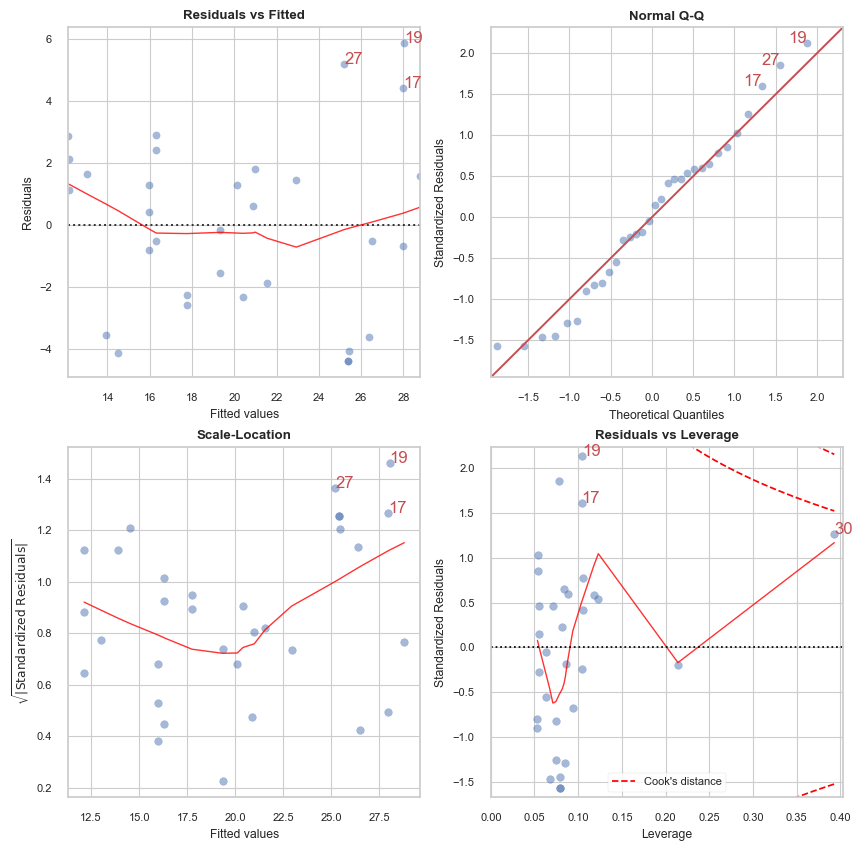

In [77]:
cls = LinearRegDiagnostic(mpg_hp_add)
vif, fig, ax = cls()


### Diagnósticos sospechosos

Consideremos el modelo `big_model` del último capítulo que se ajustó al conjunto de datos `autompg`. Utilizó `mpg` como respuesta, y consideró muchos términos de interacción entre los predictores `disp`, `hp`, y `domestic`.


In [78]:
# Read data frame from the web
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
autompg = pd.read_csv(url, sep="\s+", header=None, comment="\t", quotechar="\"", na_values=["?"])

# Assign headers to the dataframe
autompg.columns = ["mpg", "cyl", "disp", "hp", "wt", "acc", "year", "origin", "name"]

# Remove rows with missing 'hp' data
autompg = autompg[autompg['hp'].notna()]

# Remove 'plymouth reliant'
autompg = autompg[autompg['name'] != "plymouth reliant"]

# Create row names based on the engine, year, and name
autompg.index = autompg['cyl'].astype(str) + " cylinder " + autompg['year'].astype(str) + " " + autompg['name']

# Drop the 'name' column
autompg.drop('name', axis=1, inplace=True)

# Convert horsepower from object to numeric
autompg['hp'] = pd.to_numeric(autompg['hp'], errors='coerce')

# Create a dummy variable for foreign vs. domestic cars. Domestic = 1.
autompg['domestic'] = (autompg['origin'] == 1).astype(int)

# Remove 3 and 5 cylinder cars
autompg = autompg[~autompg['cyl'].isin([3, 5])]

# Change 'cyl' to a category variable
autompg['cyl'] = autompg['cyl'].astype('category')

# Display the structure (similar to str in R)
print(autompg.info())


<class 'pandas.core.frame.DataFrame'>
Index: 383 entries, 8 cylinder 70 chevrolet chevelle malibu to 4 cylinder 82 chevy s-10
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   mpg       383 non-null    float64 
 1   cyl       383 non-null    category
 2   disp      383 non-null    float64 
 3   hp        383 non-null    float64 
 4   wt        383 non-null    float64 
 5   acc       383 non-null    float64 
 6   year      383 non-null    int64   
 7   origin    383 non-null    int64   
 8   domestic  383 non-null    int32   
dtypes: category(1), float64(5), int32(1), int64(2)
memory usage: 25.9+ KB
None


In [79]:
big_model = smf.ols('mpg ~ disp * hp * domestic', data=autompg).fit()

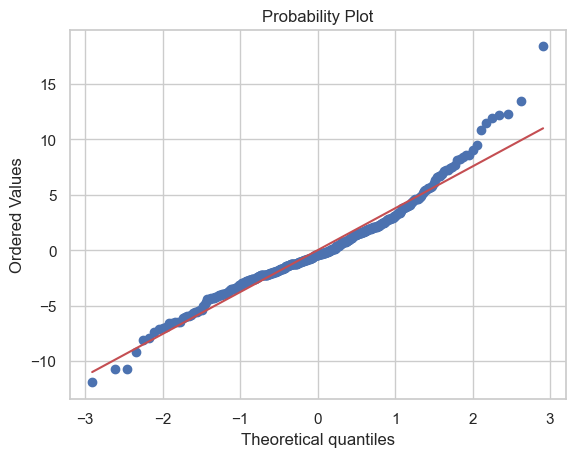

In [80]:
from scipy import stats
import matplotlib.pyplot as plt

stats.probplot(big_model.resid, plot=plt, fit=True)
plt.show()


In [81]:
shapiro_test = stats.shapiro(big_model.resid)
print(f'Shapiro test statistic: {shapiro_test[0]}')
print(f'Shapiro test p-value: {shapiro_test[1]}')


Shapiro test statistic: 0.9616078734397888
Shapiro test p-value: 1.8245273736283707e-08



En este caso, tanto el gráfico Q-Q como la prueba de Shapiro-Wilk sugieren que se incumple el supuesto de normalidad.


In [82]:
cooks_d = big_model.get_influence().cooks_distance[0]
influential_points = cooks_d > (4 / len(cooks_d))
print(np.sum(influential_points))


31


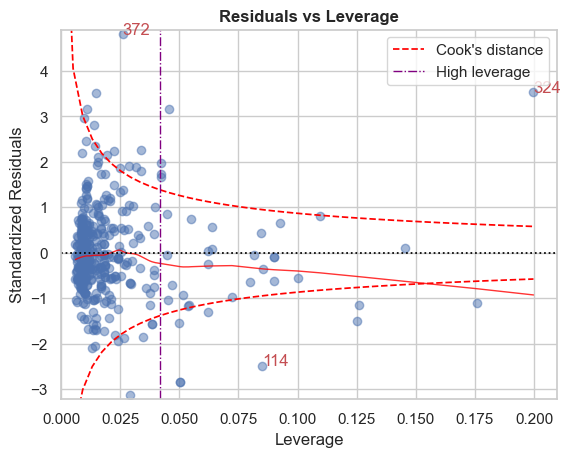

In [83]:
residuos_plot = LinearRegDiagnostic(big_model)
residuos_plot.leverage_plot(high_leverage_threshold=True, cooks_threshold='convention');




Aquí, encontramos 31 ¡así que quizás eliminarlos ayude!


In [84]:
# Filtering out influential points
filtered_data = autompg.loc[~influential_points]

# Fitting the model again
big_model_fix = smf.ols('mpg ~ disp * hp * domestic', data=filtered_data).fit()


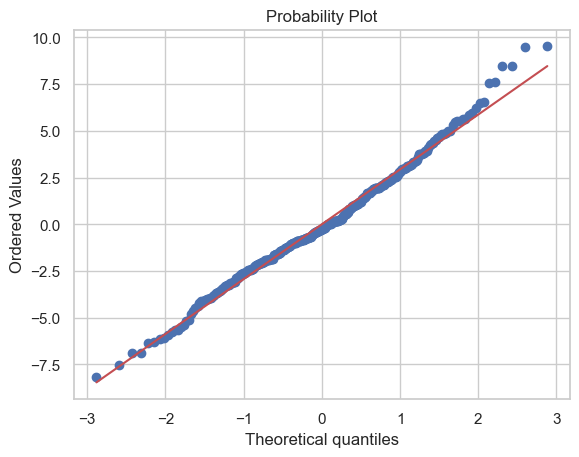

In [85]:
stats.probplot(big_model_fix.resid, plot=plt, fit=True)
plt.show()


In [86]:
shapiro_test_fix = stats.shapiro(big_model_fix.resid)
print(f'Shapiro test statistic for fixed model: {shapiro_test_fix[0]}')
print(f'Shapiro test p-value for fixed model: {shapiro_test_fix[1]}')


Shapiro test statistic for fixed model: 0.9903539419174194
Shapiro test p-value for fixed model: 0.020681185647845268



La eliminación de estos puntos da como resultado un gráfico Q-Q mucho mejor, y ahora Shapiro-Wilk no rechaza un $\alpha$ bajo.

Ahora hemos visto que a veces la modificación de los datos puede solucionar problemas con la regresión. Sin embargo, en la próxima lectura, en lugar de modificar los datos, vamos a modificar el modelo a través de *transformaciones*.

